### CROSS VALIDATION

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [5]:
X=np.random.rand(100,10)
y=np.random.rand(100)

model=RandomForestRegressor(random_state=42)

scores=cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error')
print(f"Average MAE:{-np.mean(scores):.4f}")

Average MAE:0.0853


### GRIDSEARCHCV

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid={
    'n_estimators':[100,200],
    'max_depth':[None,10,20]
}

X_train=np.random.rand(100,10)
y_train=np.random.rand(100)

grid_search=GridSearchCV(RandomForestRegressor(random_state=42),param_grid,cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(X_train,y_train)

print(f"Best parameters:{grid_search.best_params_}")
print(f"Best CV MAE:{-grid_search.best_score_:.4f}")

Best parameters:{'max_depth': None, 'n_estimators': 200}
Best CV MAE:0.2784


### SHAP Values (SHapley Additive exPlanations)

In [7]:
import shap
import xgboost as xgb

In [8]:
X_train=np.random.rand(100,10)
Y_train=np.random.rand(100)
X_val=np.random.rand(20,10)

model=xgb.XGBRegressor().fit(X_train,Y_train)

explainer=shap.Explainer(model)
shap_values=explainer(X_val)

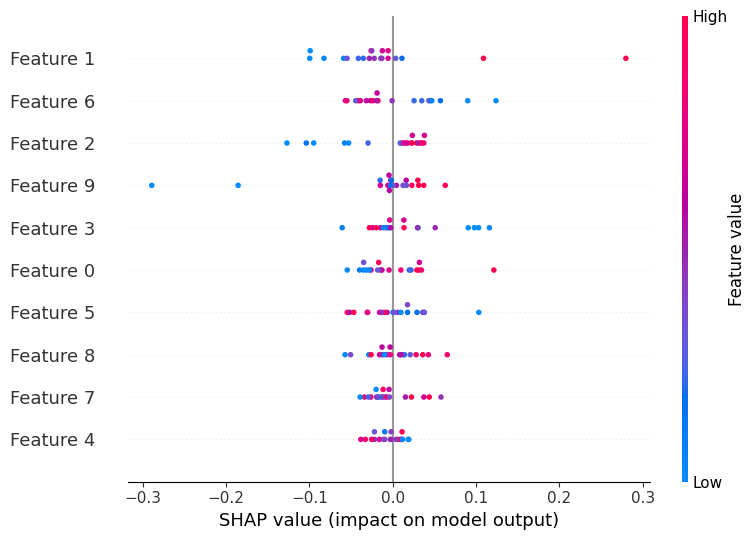

In [10]:
shap.summary_plot(shap_values,X_val)

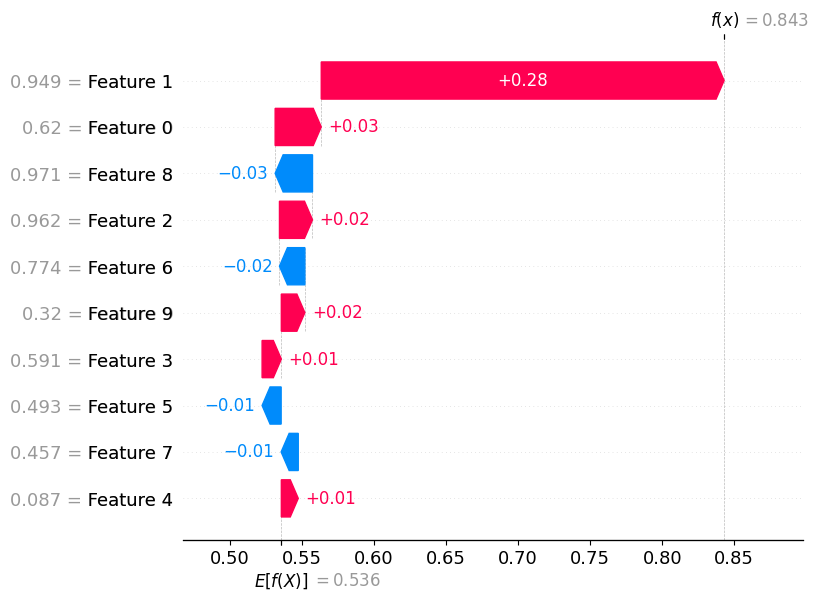

In [11]:
shap.plots.waterfall(shap_values[0])